In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 1) Replace with most frequent values / Frequent categories imputation

In [2]:
df['Sex'].value_counts() # To get the most frequent value of a column we can use the method mode .
#It will return the value that appears most often. It can be multiple values.

male      577
female    314
Name: Sex, dtype: int64

In [3]:
df['Sex'].fillna('male') # here we are doing it manually

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

### 2) Apply clasifier algorithm to predict 

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df['Sex']=np.where(df['Sex']=='male',1,0)
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [6]:
# Seperate null values from age feature 
test_data=df[df['Age'].isnull()]
train_data=df[df['Age'].isnull()==False]

In [7]:
X_train=train_data.drop(['Age','Cabin','Embarked'],axis=1)
y_train=train_data['Age']
X_test=test_data.drop(['Age','Cabin','Embarked'],axis=1)

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predicted=regressor.predict(X_test)

In [9]:
# replace missing values with predicted values
test_data.loc[test_data.Age.isnull(),'Age']=y_predicted

/tmp/ipykernel_7256/2267555641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.Age.isnull(),'Age']=y_predicted


### 3) Apply Unsupervised ML (Clustering)

### 4) Capturing NAN values with a new feature

In [10]:
df2=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
df2['Cabin_val']=np.where(df['Cabin'].isnull(),1,0)
df2['Cabin'].fillna(df2['Cabin'].mode()[2],inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_val
0,0,3,male,22.0,1,0,7.2500,G6,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,G6,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,G6,S,1


### 5) Create a new category for nan values

Suppose if you have more frequent categories, we just replace NAN with a new category

In [11]:
df3=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
df3['Cabin']=np.where(df3['Cabin'].isnull(),"Missing",df3['Cabin'])
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Missing,S


### 6) Sort values and impute with median  

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [12]:
df4=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
df4.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [13]:
median=df['Age'].sort_values().median()
df['Age'].fillna(median,inplace=True)
df['Age'].isnull().sum()

0

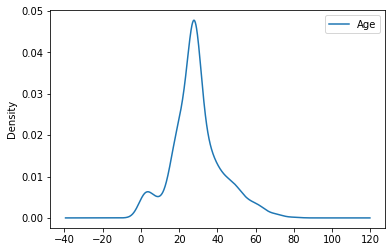

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages of mean/median/mode imputation

    >Easy to implement(Robust to outliers)
    >Faster way to obtain the complete dataset #### Disadvantages
    >Change or Distortion in the original variance
    >Impacts Correlation


### 7) Replacing with Arbitrary Value / Arbitrary Value Imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value we want to look for a value that is at the end of the distribution. Replacing the NA by arbitrary values should be used when there are reasons to believe that the NA is not missing at random. In situations like this, we would not like to replace it with the median or the mean and therefore make the NA look like the majority of our observations. Instead, we want to flag the fact that the observation is missing.
https://medium.com/analytics-vidhya/feature-engineering-part-1-arbitrary-value-imputation-e81444bd79b2

In [15]:
df5=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
df5.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


<AxesSubplot:>

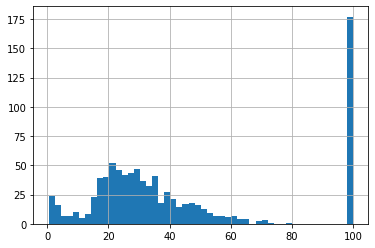

In [16]:
df5['Age'].fillna(100,inplace=True)
df5['Age'].hist(bins=50)

### 8) Forward Fill - Backward fill

In [17]:
df6=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
df6.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [18]:
#df6.fillna(method='ffill', inplace=True)
#df6.head(6)

In [19]:
df6.fillna(method='bfill', inplace=True)
df6.head(7)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,54.0,8.4583
6,0,54.0,51.8625


### 9) End of Distribution imputation


<AxesSubplot:>

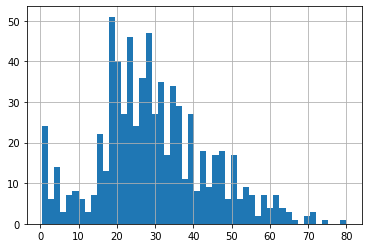

In [20]:
df7=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
df7.Age.hist(bins=50)

<AxesSubplot:>

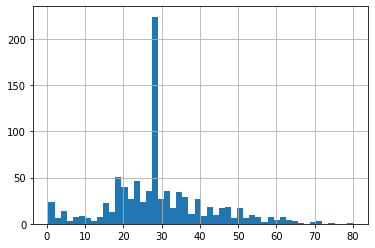

In [21]:
extreme=df7.Age.mean()+3*df7.Age.std()
def impute_nan(df,variable,median,extreme):
    df7[variable+"_end_distribution"]=df7[variable].fillna(extreme)
    df7[variable].fillna(median,inplace=True)
impute_nan(df7,'Age',df7.Age.median(),extreme)
df7['Age'].hist(bins=50)

<AxesSubplot:>

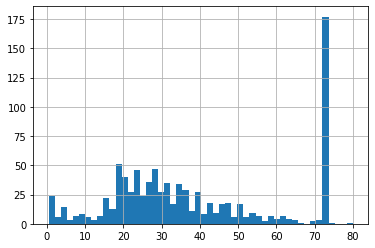

In [22]:
df7['Age_end_distribution'].hist(bins=50)

### 10) Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
When should it be used? It assumes that the data are missing completely at random(MCAR)

In [23]:
df8=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
##It will have the random sample to fill the na
random_sample=df8['Age'].dropna().sample(df8['Age'].isnull().sum(),random_state=0)
##pandas need to have same index in order to merge the dataset
random_sample.index=df8[df8['Age'].isnull()].index
df8.loc[df8['Age'].isnull(),'Age']=random_sample
df8['Age'].isnull().sum()

0

### 11) Interpolation 

Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in increasing order. In short, It estimates the unknown value in the same increasing order from previous values. The default method used by Interpolation is Linear so while applying it we did not need to specify it.
https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

In [24]:
df9=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Age','Fare','Survived'])
df9.interpolate(method="polynomial", order=1,inplace=True) # polynomial of order 1 is linear
df9['Age'].isnull().sum()

0